<a href="https://colab.research.google.com/github/dan-august0/Python_DataScience/blob/main/Atividade_Explora%C3%A7%C3%A3o_e_An%C3%A1lise_Inicial_de_Dados_Reais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
df = pd.read_csv("./Pizzaria/order_details.csv")
df

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1
...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1
48616,48617,21348,four_cheese_l,1
48617,48618,21348,napolitana_s,1
48618,48619,21349,mexicana_l,1


In [50]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   order_details_id  48620 non-null  int64 
 1   order_id          48620 non-null  int64 
 2   pizza_id          48620 non-null  object
 3   quantity          48620 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


,order_details_id,order_id,quantity
count,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622
std,14035.529381,6180.119770,0.143077
min,1.000000,1.000000,1.000000
25%,12155.750000,5337.000000,1.000000
50%,24310.500000,10682.500000,1.000000
75%,36465.250000,16100.000000,1.000000
max,48620.000000,21350.000000,4.000000


In [51]:
#cacular somente as colunas numéricas
df_num = df.select_dtypes(include=["int64", "float64"])

In [52]:
# Tendência central
print("Médias:\n", df_num.mean(), "\n")
print("Medianas:\n", df_num.median(), "\n")
print("Modas:\n", df_num.mode().iloc[0], "\n")

Médias:
 order_details_id    24310.500000
order_id            10701.479761
quantity                1.019622
dtype: float64 

Medianas:
 order_details_id    24310.5
order_id            10682.5
quantity                1.0
dtype: float64 

Modas:
 order_details_id        1.0
order_id            10760.0
quantity                1.0
Name: 0, dtype: float64 



In [53]:
# Dispersão
print("Variâncias:\n", df_num.var(), "\n")
print("Desvios padrão:\n", df_num.std(), "\n")
print("Amplitude:\n", df_num.max() - df_num.min(), "\n")

Variâncias:
 order_details_id    1.969961e+08
order_id            3.819388e+07
quantity            2.047103e-02
dtype: float64 

Desvios padrão:
 order_details_id    14035.529381
order_id             6180.119770
quantity                0.143077
dtype: float64 

Amplitude:
 order_details_id    48619
order_id            21349
quantity                3
dtype: int64 



In [54]:
# Agrupando por pizza_id e somando as quantidades
pizzas_vendidas = df.groupby("pizza_id")["quantity"].sum().reset_index()

# Ordenando do maior para o menor
pizzas_vendidas = pizzas_vendidas.sort_values(by="quantity", ascending=False)

# Exibir as 10 pizzas mais vendidas
print(pizzas_vendidas.head(10))



         pizza_id  quantity
3      big_meat_s      1914
80     thai_ckn_l      1410
20  five_cheese_l      1409
21  four_cheese_l      1316
18  classic_dlx_m      1181
68   spicy_ital_l      1109
28     hawaiian_s      1020
65   southw_ckn_l      1016
0       bbq_ckn_l       992
1       bbq_ckn_m       956


In [82]:
pizzas = pd.read_csv("./Pizzaria/pizzas.csv")
pizzas[pizzas['pizza_id'] == 'big_meat_s']
# df_grouped = df.join(pizzas.set_index("pizza_id"), on="pizza_id")
# df_grouped

,pizza_id,pizza_type_id,size,price
18,big_meat_s,big_meat,S,12.0


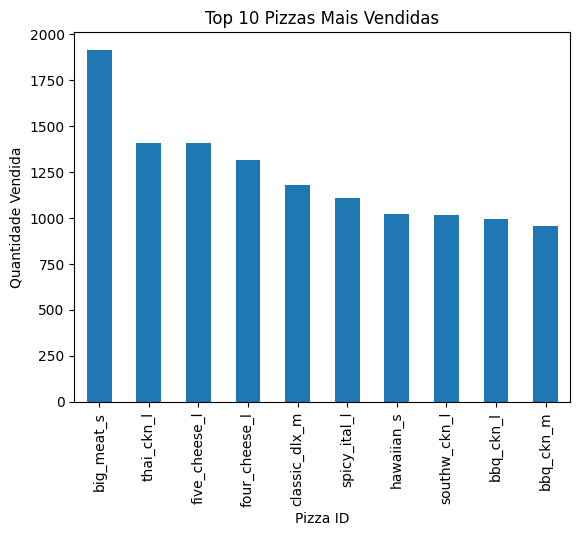

In [55]:
df.groupby("pizza_id")["quantity"].sum().sort_values(ascending=False).head(10).plot(kind="bar",title="Top 10 Pizzas Mais Vendidas")

plt.xlabel("Pizza ID")
plt.ylabel("Quantidade Vendida")
plt.show()

In [67]:
#Mostra a pizza mais cara
mais_cara = pizzas.loc[pizzas["price"].idxmax()]
print("Pizza mais cara:")
print(mais_cara)

Pizza mais cara:
pizza_id         the_greek_xxl
pizza_type_id        the_greek
size                       XXL
price                    35.95
Name: 43, dtype: object


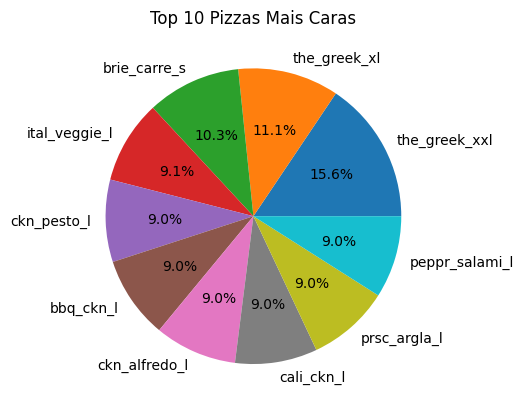

In [74]:
pizzas.groupby("pizza_id")["price"].sum().sort_values(ascending=False).head(10).plot(
    kind="pie",
    autopct="%1.1f%%",   # mostra percentual
    title="Top 10 Pizzas Mais Caras"
)

plt.ylabel("")  # remove o label do eixo Y
plt.show()

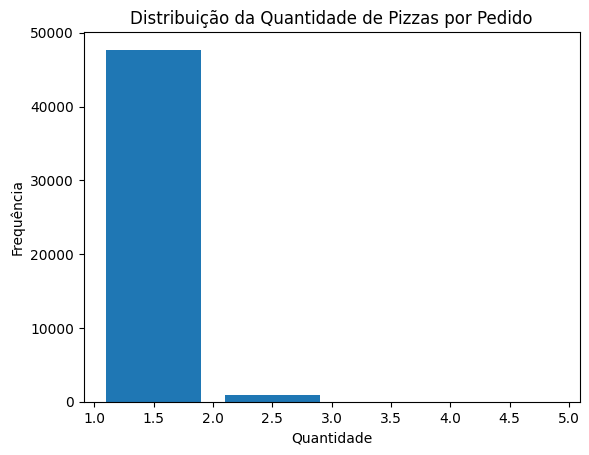

In [ ]:
df["quantity"].plot(
    kind="hist",
    bins=range(1, df["quantity"].max()+2),
    rwidth=0.8,
    title="Distribuição da Quantidade de Pizzas por Pedido"
)
plt.xlabel("Quantidade")
plt.ylabel("Frequência")
plt.show()

## **Principais características do dataset**

**Estrutura dos dados**

O dataset tem 48.620 registros.
Cada linha representa um item de pedido (não o pedido inteiro).
As colunas principais são: order_id, pizza_id (pedido, sabor/tipo da pizza) e quantity (quantidade pedida daquele sabor).



**Medidas de tendência central**

Para a variável quantity:

Média ≈ 1,02, Mediana = 1, Moda = 1.

Isso indica que a grande maioria dos clientes pede apenas 1 pizza por sabor.
Para order_id e order_details_id, as estatísticas não trazem muita informação analítica, pois são apenas identificadores.



**Medidas de dispersão**

Desvio padrão baixo (≈ 0,14) e variância muito pequena → confirma que os pedidos de quantidade quase não variam.

Amplitude = 3 → há casos de clientes pedindo até 4 pizzas iguais, mas são exceções.



**Gráficos**

Histograma da quantidade → concentrado em 1 pizza, mostrando a homogeneidade nos pedidos.

Gráfico de barras (Top 10 sabores) → revela quais sabores são mais populares. Alguns sabores se destacam fortemente, enquanto a maioria tem vendas menores.

Gráfico de Pizza (Top 10 pizza mais caras) → mostra qual é a pizza mais cara em USD.



**Interpretação geral**

O dataset mostra um padrão de consumo bem estável: os clientes geralmente pedem 1 pizza por sabor.
Existe um núcleo de sabores muito populares, que representam a maior parte das vendas, enquanto os demais têm saída mais baixa.
Atravez do grafico das pizzas mais caras e da mais vendida, pode se observar que a pizza mais vendida não entra nem no top 10 das mais caras.
Isso sugere que o restaurante pode focar seus esforços de marketing, promoções e controle de estoque nesses sabores mais vendidos.